# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных.Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что вовремя сдал задание:) Ты проделал большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта. 

</div>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Большая часть таблицы имеет пропуски, есть проблемы с типами данных.  Всего 23699 строчки

<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>
Хорошее начало, так держать!)

### Шаг 2. Предобработка данных

In [2]:
df['rooms'] = df['rooms'].fillna(0)

df.loc[df['rooms'] == 0, 'rooms'] = 1

# В основном все пропущенные значение в столбце rooms были в квартирах с площадью меньше 50 кв.м.
# Я заполнил их единицей, квартиру с площадью в 371 кв.м. из списка пропущенных значений
# ввел 6 комнат.
df[df['ceiling_height'].isnull()]
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
# Решил заполнить пропущенные значение в столбце ceiling_height средним значением по столбцу
df['balcony'] = df['balcony'].fillna(0)
#df.info()

df['last_price'] = df['last_price'].astype(int)
df['first_day_exposition'] = pd.DatetimeIndex(df['first_day_exposition'])
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df










,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3,3,2019
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,3,8,2015
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,1,3,2017
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0,1,2018
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2,2018
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,1,3,2017


### Вывод:  В основном все пропущенные значение в столбце rooms были в квартирах с площадью меньше 50 кв.м. Их 197. Всего 5 колонок больше 50 кв.м. оставим в них пропуски. Я заполнил квартиры с площадью <50 в столбце rooms 1 комнатой, квартиру с площадью в 371 кв.м. из списка пропущенных значений ввел 6 комнат. В столбце ceiling_height ввел медианное значение для пропущенных.

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>



Хорошо

### Шаг 3. Посчитайте и добавьте в таблицу

In [3]:
df['price_per_m2'] = df['last_price'] / df['total_area']
df['price_per_m2'] = df['price_per_m2'].astype('int64')
df['floors_total'] = df[df['floors_total'].notnull()]['floors_total'].astype('int')
df['ceiling_height'] = df['ceiling_height'].round(2)
                          

In [4]:
df['first_floor'] = (df['floor'] ==1) *1
df['last_floor'] = (df['floor'] == df['floors_total']) *1
df['other_floor'] = ((df['last_floor'] == 0) & (df['first_floor'] == 0)) *1

In [5]:
df['living_total_area'] = df['living_area'] / df['total_area']
df['kitchen_total_area'] = df['kitchen_area'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year,price_per_m2,first_floor,last_floor,other_floor,living_total_area,kitchen_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3,3,2019,120370,0,0,1,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1,12,2018,82920,1,0,0,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,3,8,2015,92785,0,0,1,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,4,7,2015,408176,0,0,1,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,1,6,2018,100000,0,0,1,0.320000,0.410000


### Вывод: Получили столбец со стоимость квадратного метра, исправили тип данных. Произвели категоризациию по этажам, получили три новых столбца с первым, послденим и другим этажами. Округлил столбец высоты потолков, для легкости восприятия цифр. Так же добавил два столбца с жилой и кухонной площади к жилой. Данные приобрели рабочий вид, можно производить исследовательский Анализ.

<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>
Хорошо

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [6]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().round(2)
df['total_area'].quantile(0.05), df['total_area'].quantile(0.95)

(31.0, 116.0)

Text(0, 0.5, 'Кол-во')

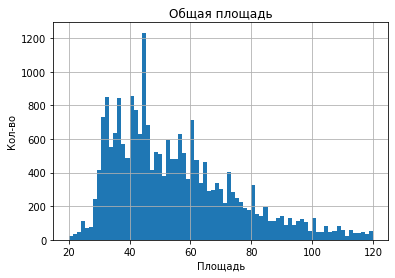

In [7]:
ax = df['total_area'].plot(kind='hist', bins=75, range=(20,120), title='Общая площадь', grid=True)
ax.set_xlabel('Площадь')
ax.set_ylabel('Кол-во')

### Вывод: Больше всего квартир с площадью 45 кв.м. Так же плотность есть в районе с 30 до 45. После есть подъем в районе 60 кв.м. но их почти в два раза меньше чем квартир с площадью 45 кв.м.

In [8]:
df['last_price'].quantile(0.05), df['last_price'].quantile(0.95)

(1870000.0, 15300000.0)

Text(0, 0.5, 'Кол-во')

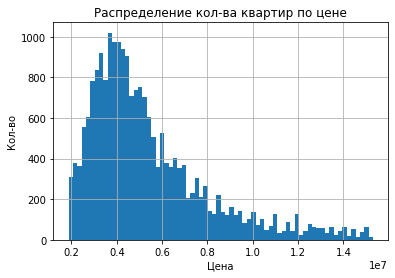

In [9]:
ax = df['last_price'].plot(kind='hist', bins=70, range=(1870000,15300000), title='Распределение кол-ва квартир по цене', grid=True)
ax.set_xlabel('Цена')
ax.set_ylabel('Кол-во')

### Вывод: Болшинство квартир в районе 4 млн.руб. после 4 млн. руб.  наблюдается тендцения на падение кол-ва квартир, в некоторых областях есть незначительное возвышение.

Text(0, 0.5, 'Кол-во квартир')

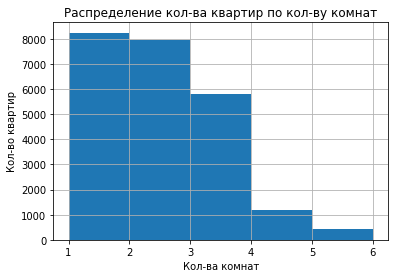

In [10]:
ax = df['rooms'].plot(kind='hist', bins=5, range=(1,6), title='Распределение кол-ва квартир по кол-ву комнат', grid=True)
ax.set_xlabel('Кол-ва комнат')
ax.set_ylabel('Кол-во квартир')

Больше комнат - меньше квартир. Самые распространненые-это однокомнатные квартиры, после 2-х комнтаные и далее по порядку.

Text(0, 0.5, 'Кол-во квартир')

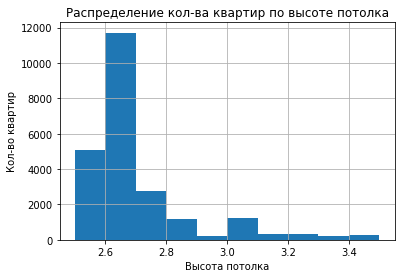

In [11]:
ax = df['ceiling_height'].plot(kind='hist', bins=10, range=(2.5,3.5), title='Распределение кол-ва квартир по высоте потолка', grid=True)
ax.set_xlabel('Высота потолка')
ax.set_ylabel('Кол-во квартир')

Преобладают квартиры с потолком 2.65, наверняка из-за того, что пропущунные значения были заполненны медианным 

In [12]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [13]:
df['days_exposition'].mean(), df['days_exposition'].median()

(180.88863436982163, 95.0)

In [14]:
df['days_exposition'].quantile(0.05), df['days_exposition'].quantile(0.95)

(9.0, 647.0)

Text(0, 0.5, 'Кол-во квартир')

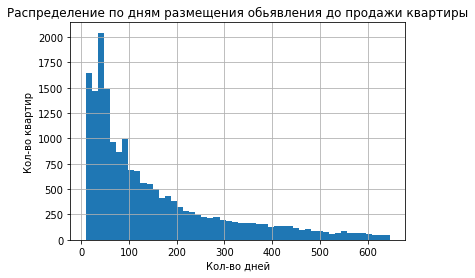

In [15]:
ax = df['days_exposition'].plot(kind='hist', bins=50, range=(9,647), title='Распределение по дням размещения обьявления до продажи квартиры', grid=True)
ax.set_xlabel('Кол-во дней')
ax.set_ylabel('Кол-во квартир')

Text(0, 0.5, 'Кол-во квартир')

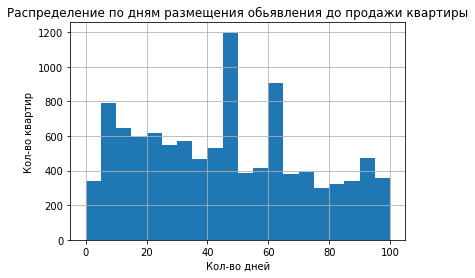

In [16]:
ax = df['days_exposition'].plot(kind='hist', bins=20, range=(0,100), title='Распределение по дням размещения обьявления до продажи квартиры', grid=True)
ax.set_xlabel('Кол-во дней')
ax.set_ylabel('Кол-во квартир')

<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Отличные визуализации

### Вывод: Как мы видим на первом графике до 100 дней, в основном, продаются квартиры, на втором графике видим основные "удачные дни" объявления это 45 и 60 . В эти дни продаются квартиры чаще

In [17]:
df[['last_price', 'price_per_m2', 'rooms', 'cityCenters_nearest']].corr()

,last_price,price_per_m2,rooms,cityCenters_nearest
last_price,1.000000,0.736499,0.365209,-0.206747
price_per_m2,0.736499,1.000000,0.057463,-0.317951
rooms,0.365209,0.057463,1.000000,-0.186991
cityCenters_nearest,-0.206747,-0.317951,-0.186991,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda2fc07550>,
      dtype=object)

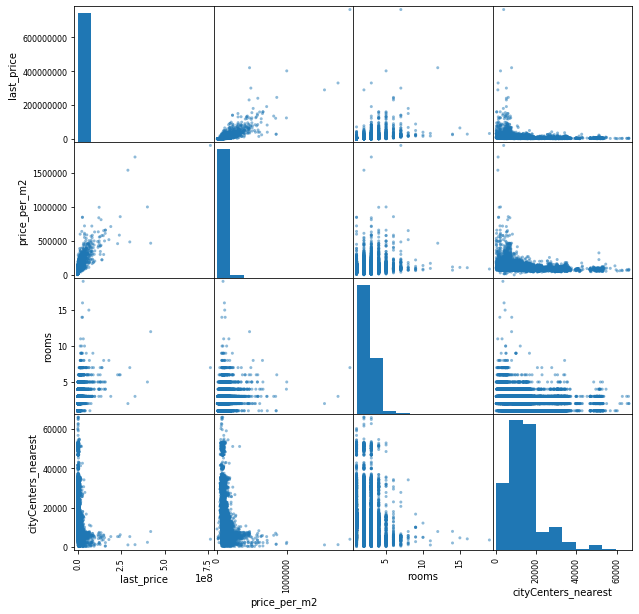

In [18]:
pd.plotting.scatter_matrix(df[['last_price', 'price_per_m2', 'rooms', 'cityCenters_nearest']], figsize=(10,10))

In [19]:
df[['last_price', 'first_floor', 'last_floor', 'other_floor']].corr()

,last_price,first_floor,last_floor,other_floor
last_price,1.000000,-0.059810,0.029330,0.020543
first_floor,-0.059810,1.000000,-0.143098,-0.625789
last_floor,0.029330,-0.143098,1.000000,-0.679022
other_floor,0.020543,-0.625789,-0.679022,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda2f6e8510>,
      dtype=object)

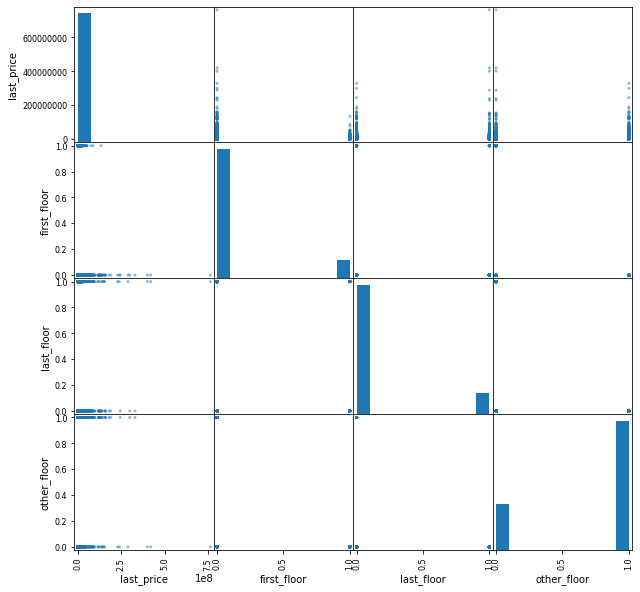

In [20]:
pd.plotting.scatter_matrix(df[['last_price', 'first_floor', 'last_floor', 'other_floor']], figsize=(10,10))

In [21]:
top_locality = df['locality_name'].value_counts().head(10)
locality_price = df.pivot_table(index='locality_name', values='price_per_m2')
top_10 = locality_price.merge(top_locality,  how='right', left_index=True, right_index=True)
top_10.sort_values(by='price_per_m2', ascending=False)

,price_per_m2,locality_name
Санкт-Петербург,114848.565231,15721
Пушкин,103125.373984,369
деревня Кудрово,92473.086957,299
посёлок Парголово,90175.489297,327
посёлок Мурино,85751.733716,522
посёлок Шушары,78676.904545,440
Колпино,75424.150888,338
Гатчина,68745.693811,307
Всеволожск,68654.007538,398
Выборг,58141.489451,237


In [22]:
#df.query('locality_name == "Санкт-Петербург"')
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round()

In [23]:
m2_from_center = df.groupby(['cityCenters_nearest_km'])['price_per_m2'].median()
m2_from_center = m2_from_center.to_frame()
m2_from_center['cityCenters_nearest_km'] = m2_from_center.index
m2_from_center.head()

,price_per_m2,cityCenters_nearest_km
cityCenters_nearest_km,,
0.0,172619.0,0.0
1.0,128398.0,1.0
2.0,123622.0,2.0
3.0,108468.5,3.0
4.0,117391.0,4.0


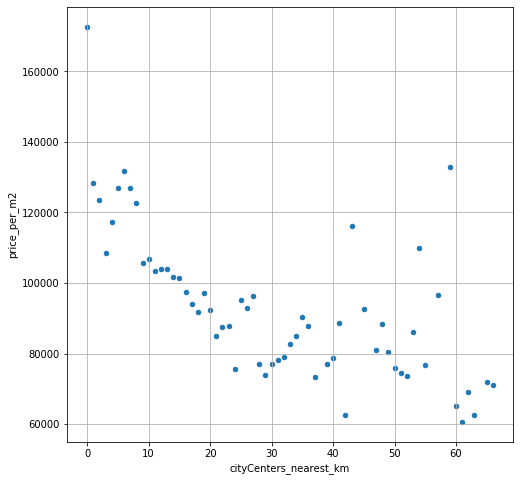

In [24]:
m2_from_center.plot.scatter(x='cityCenters_nearest_km', y='price_per_m2', grid=True, figsize=(8,8))

In [25]:
center =  df[df['cityCenters_nearest_km'] <= 3]
center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year,price_per_m2,first_floor,last_floor,other_floor,living_total_area,kitchen_total_area,cityCenters_nearest_km
24,8,6500000,97.2,2015-10-31,2,2.65,3.0,46.5,1,NaN,False,False,19.6,0.0,Санкт-Петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265.0,5,10,2015,66872,1,0,0,0.478395,0.201646,2.0
99,32,9600000,90.0,2017-09-26,4,2.65,5.0,67.0,2,NaN,False,False,8.0,0.0,Санкт-Петербург,23277.0,2818.0,0.0,NaN,0.0,NaN,104.0,1,9,2017,106666,0,0,1,0.744444,0.088889,3.0
138,8,4800000,40.0,2017-11-18,2,2.65,3.0,29.0,2,NaN,False,False,6.0,0.0,Санкт-Петербург,23371.0,2913.0,0.0,NaN,2.0,729.0,80.0,5,11,2017,120000,0,0,1,0.725000,0.150000,3.0
154,1,8200000,80.0,2018-11-06,3,4.15,3.0,44.2,2,NaN,False,False,12.2,0.0,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0,1,11,2018,102500,0,0,1,0.552500,0.152500,3.0
155,8,96000000,317.0,2017-07-07,4,3.50,3.0,183.0,3,NaN,False,False,NaN,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0,4,7,2017,302839,0,1,0,0.577287,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23430,18,5260000,38.0,2018-11-06,1,3.30,5.0,16.0,1,NaN,False,False,12.0,0.0,Санкт-Петербург,24675.0,3441.0,2.0,538.0,1.0,466.0,12.0,1,11,2018,138421,1,0,0,0.421053,0.315789,3.0
23449,4,6300000,52.6,2015-05-28,3,3.25,5.0,29.8,2,NaN,False,False,8.7,0.0,Санкт-Петербург,22460.0,3400.0,2.0,218.0,3.0,69.0,505.0,3,5,2015,119771,0,0,1,0.566540,0.165399,3.0
23555,5,15350000,158.5,2019-03-07,7,2.95,7.0,57.4,7,NaN,False,False,12.4,1.0,Санкт-Петербург,23546.0,3088.0,1.0,347.0,0.0,NaN,NaN,3,3,2019,96845,0,1,0,0.362145,0.078233,3.0
23602,0,8700000,73.0,2019-01-23,3,2.65,4.0,NaN,4,NaN,False,False,NaN,0.0,Санкт-Петербург,20415.0,2345.0,2.0,57.0,3.0,151.0,34.0,2,1,2019,119178,0,1,0,NaN,NaN,2.0


<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Теперь центр выделен верно, молодец

In [26]:
center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().round(3) - df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().round(3)

,total_area,last_price,rooms,ceiling_height
count,-22816.000,-2.281600e+04,-22816.000,-22816.000
mean,38.253,9.743037e+06,1.035,0.346
std,20.800,1.551514e+07,0.410,-0.083
min,0.000,2.087810e+06,0.000,1.500
25%,23.300,3.900000e+06,1.000,0.050
50%,33.000,5.150000e+06,1.000,0.350
75%,46.600,8.195000e+06,1.000,0.600
max,-383.000,-3.617000e+08,-5.000,-73.000


In [27]:
center[['price_per_m2', 'rooms']].corr()

,price_per_m2,rooms
price_per_m2,1.000000,-0.044835
rooms,-0.044835,1.000000


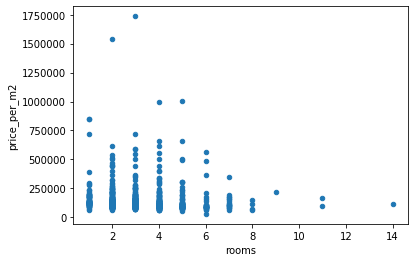

In [28]:
center[['price_per_m2', 'rooms']].plot.scatter(x='rooms', y='price_per_m2')

In [29]:
center[['price_per_m2', 'first_floor']].corr()

,price_per_m2,first_floor
price_per_m2,1.00000,-0.07986
first_floor,-0.07986,1.00000


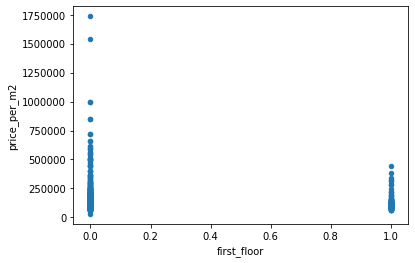

In [30]:
center[['price_per_m2', 'first_floor']].plot.scatter(x='first_floor', y='price_per_m2')

In [31]:
center[['price_per_m2', 'other_floor']].corr()

,price_per_m2,other_floor
price_per_m2,1.00000,0.07894
other_floor,0.07894,1.00000


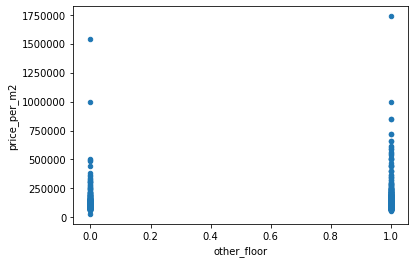

In [32]:
center[['price_per_m2', 'other_floor']].plot.scatter(x='other_floor', y='price_per_m2')

In [33]:
center[['price_per_m2', 'last_floor']].corr()

,price_per_m2,last_floor
price_per_m2,1.000000,-0.024096
last_floor,-0.024096,1.000000


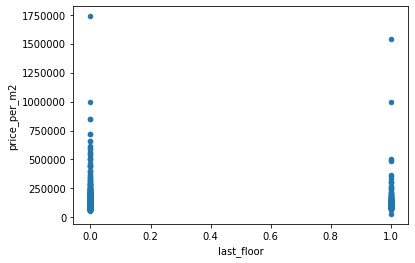

In [34]:
center[['price_per_m2', 'last_floor']].plot.scatter(x='last_floor', y='price_per_m2')

In [35]:
center['total_area'].quantile(0.05), center['total_area'].quantile(0.95)

(40.28, 210.89999999999998)

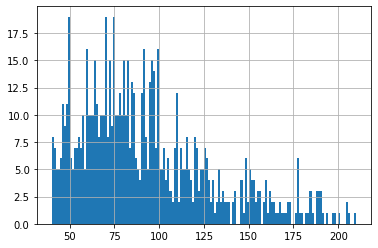

In [36]:
center['total_area'].hist(bins=150, range=(40,210))

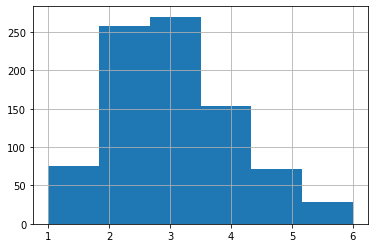

In [37]:
center['rooms'].hist(bins=6, range=(1,6))

Text(0, 0.5, 'Кол-во квартир')

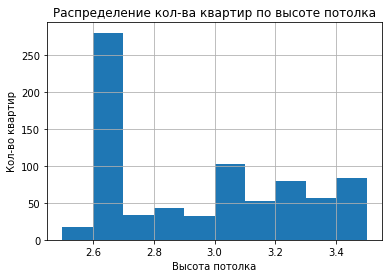

In [38]:
ax = center['ceiling_height'].plot(kind='hist', bins=10, range=(2.5,3.5), title='Распределение кол-ва квартир по высоте потолка', grid=True)
ax.set_xlabel('Высота потолка')
ax.set_ylabel('Кол-во квартир')

In [39]:
center['days_exposition'].quantile(0.05), center['days_exposition'].quantile(0.95)

(11.000000000000002, 813.0999999999999)

Text(0, 0.5, 'Кол-во квартир')

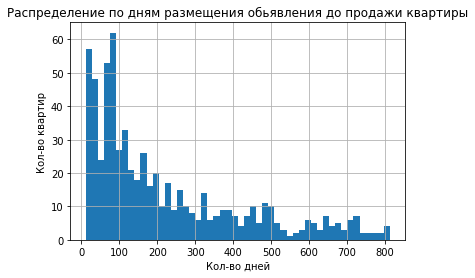

In [40]:
ax = center['days_exposition'].plot(kind='hist', bins=50, range=(11,813), title='Распределение по дням размещения обьявления до продажи квартиры', grid=True)
ax.set_xlabel('Кол-во дней')
ax.set_ylabel('Кол-во квартир')

Text(0, 0.5, 'Кол-во квартир')

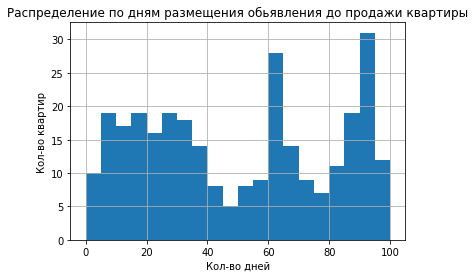

In [41]:
ax = center['days_exposition'].plot(kind='hist', bins=20, range=(0,100), title='Распределение по дням размещения обьявления до продажи квартиры', grid=True)
ax.set_xlabel('Кол-во дней')
ax.set_ylabel('Кол-во квартир')

### Шаг 5. Общий вывод

Начиная с центральных квартир, чем ближе к центру тем дороже квартира. 

В центре площади квартир больше, больше всего квартир с 50, 70, 75 кв.м. так же есть подьем в районе 95 и 100 кв.м. Это объясняется тем, что в центре больше всего 3-х комнатных квартир, а после идут 2-х комнатные, после 4-х комнтатные, и 1-а комнатные и 5-и комнатные на равне, ситация за пределами центра совсем другая, больше всего 1 комнатных, псоле по порядке мягкий спад и резкий на 4-х комнатных их совсем мало за пределами центра. 

В центре имеется больше намного больше квартир с высотой потолков выше 3-х метров, но во всех районах более популрным значением остается 2,7 метров.

Квартиры в центре продаются дольше чем квартиры за пределами центра, как мы видим по графикам, в пределах центра, квартиры чаще всего продаются в течении 45 дней, а так же после идет 60 дней. В центре же большинство квартир продатеся на 90-й день с момента появления объявления,  а после идет цифра в  60 дней.

Больше всего влияет на цену - близость к центру, после по уменьшению влияния: кол-во комнат, этаж, высота потолка.

Большим спросом пользуются квартиры которые не расположены на первом и последнем этаже, так же этот факт больше влияет на цену. Особенно это заметно в центре.

В центре сильнее зависимость цены от факторов, таких как кол-во комнта, этаж  и высота потолка, чем ближе к центру тем сильнее зависимость.

<div style="border:solid green 2px; padding: 20px">

<h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>
Классные, точные и обоснованные выводы, супер)

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции, названия переменных передают смысл операций. В качестве совета предлагаю глубже изучить и начать применять конструкцию try-except в решении задачи — это улучшит отказоустойчивость кода и обезопасит код от поломок в будущем и так же можешь изучить библиотеку seaborn для построение ещё более наглядных и качетсвенных визуализаций в будущем.

#### Выводы

У тебя отлично получается анализировать сложные данные, выдвигать корректные гипотезы и проверять свои выводы на возможность соответствия реальности. Видно глубокое понимание сути проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, так держать!)
